In [6]:
import numpy as np

# arq = open("alunos.txt")
# # manipulação do arquivo
# arq.close()

novo_array = []
with open("alunos.txt") as arq:
  for linha in arq:
    linha = linha.strip()
    lista_aux = linha.split(",")
    novo_array.append(lista_aux)

print(novo_array)
alunos_array = np.array(novo_array, dtype="float64")
alunos_array += 1
print(alunos_array)

[['6.7', '3.2', '8.5'], ['3.1', '3.7', '2.6'], ['8.7', '9.1', '7.4'], ['0.2', '0', '2']]
[[ 7.7  4.2  9.5]
 [ 4.1  4.7  3.6]
 [ 9.7 10.1  8.4]
 [ 1.2  1.   3. ]]


In [7]:
# import pandas
# pandas.DataFrame()

# from pandas import *
# DataFrame

import pandas as pd
df_alunos = pd.DataFrame(alunos_array, columns=["P1", "Prova 2", "P3"])
print(df_alunos[:1])
print("Notas do primeiro aluno:", df_alunos.iloc[0])
print("Notas da P2 para cada aluno:",df_alunos["Prova 2"])
print(df_alunos.P1 - 1)

print("Nota da P1 do primeiro aluno:", df_alunos.P1[0])
print("Nota da P1 do primeiro aluno:", df_alunos.iloc[0]["P1"])
print("Nota da P1 do primeiro aluno:", df_alunos[:1]["P1"])

# Independente do que eu usei como indexador das linhas e das colunas, eu posso usar os índices como se eu estivesse lidando com uma matriz
print("Nota da P1 do primeiro aluno:", df_alunos.iloc[0, 0]) # [0][0]

df_alunos.index = ["Robertin", "Carlin", "Claudin", "Bochecha"]

print("Nota da P1 do primeiro aluno:", df_alunos.iloc[0][0])

# No caso do .loc, eu sempre vou utilizar os índices de linha e coluna, respectivamente, que eu defini
print("Notas do primeiro aluno usando o seu nome:", df_alunos.loc["Robertin"])

# df_alunos = df_alunos.rename(columns = {"Prova 2": "P2"})
df_alunos.rename(columns = {"Prova 2": "P2"}, inplace=True)

# O resultado do print abaixo é uma Series, que nada mais é do que uma representação de uma coluna ou uma linha de um dataframe
print("A média de cada prova, e não de cada aluno... :(", df_alunos.mean()) # portanto calculou a média para cada coluna (axis = 0)
df_alunos["Média"] = df_alunos.mean(axis=1)
df_alunos["Desvio Padrão"] = df_alunos[["P1", "P2", "P3"]].std(axis=1)
df_alunos["Menor Nota"] = df_alunos[["P1", "P2", "P3"]].min(axis=1)
df_alunos["Maior Nota"] = df_alunos[["P1", "P2", "P3"]].max(axis=1)
df_alunos["Mediana"] = df_alunos[["P1", "P2", "P3"]].median(axis=1)

print("Calculando mais de uma estatítstica usando AGG (para cada prova):\n", df_alunos[["P1", "P2", "P3"]].agg(["mean", "min", "max"]))
print("Calculando mais de uma estatítstica usando AGG (para cada aluno):\n", df_alunos[["P1", "P2", "P3"]].agg(["mean", "min", "max"], axis=1))

print("Estatísticas com DESCRIBE:\n", df_alunos.describe())

# Alterei a nota do primeiro aluno e preciso calcular novamente a média
df_alunos.iloc[0, 0] = 7.5

print(df_alunos.mean(axis=1))

print("Selecionando colunas específicas:", df_alunos[["P1", "P2", "P3"]])
df_alunos["Média"] = df_alunos[["P1", "P2", "P3"]].mean(axis=1)
# df_alunos["Média"] = df_alunos.mean(axis=1)

# Printando o dataframe do jeito bonitinho
df_alunos

    P1  Prova 2   P3
0  7.7      4.2  9.5
Notas do primeiro aluno: P1         7.7
Prova 2    4.2
P3         9.5
Name: 0, dtype: float64
Notas da P2 para cada aluno: 0     4.2
1     4.7
2    10.1
3     1.0
Name: Prova 2, dtype: float64
0    6.7
1    3.1
2    8.7
3    0.2
Name: P1, dtype: float64
Nota da P1 do primeiro aluno: 7.7
Nota da P1 do primeiro aluno: 7.7
Nota da P1 do primeiro aluno: 0    7.7
Name: P1, dtype: float64
Nota da P1 do primeiro aluno: 7.7
Nota da P1 do primeiro aluno: 7.7
Notas do primeiro aluno usando o seu nome: P1         7.7
Prova 2    4.2
P3         9.5
Name: Robertin, dtype: float64
A média de cada prova, e não de cada aluno... :( P1    5.675
P2    5.000
P3    6.125
dtype: float64
Calculando mais de uma estatítstica usando AGG (para cada prova):
          P1    P2     P3
mean  5.675   5.0  6.125
min   1.200   1.0  3.000
max   9.700  10.1  9.500
Calculando mais de uma estatítstica usando AGG (para cada aluno):
               mean  min   max
Robertin  7.133333  4

P1    P2   P3     Média  Desvio Padrão  Menor Nota  Maior Nota  \
Robertin  7.5   4.2  9.5  7.066667       2.695057         4.2         9.5   
Carlin    4.1   4.7  3.6  4.133333       0.550757         3.6         4.7   
Claudin   9.7  10.1  8.4  9.400000       0.888819         8.4        10.1   
Bochecha  1.2   1.0  3.0  1.733333       1.101514         1.0         3.0   

          Mediana  
Robertin      7.7  
Carlin        4.1  
Claudin       9.7  
Bochecha      1.2

In [8]:
# Quem são os alunos que possuem a menor nota maior do que 2?
print(df_alunos[df_alunos["Menor Nota"] > 2].index)

# idx_max, idx_min

# Quem são os alunos que tiraram acima de 5 na P1
print(df_alunos.query("P1 > 5").index)

# Quem são os alunos que tiraram acima de 3 na P3 e fecharam com média maior ou igual de 6?
print(df_alunos[(df_alunos["P3"] > 3) & (df_alunos["Média"] >= 6)].index)

print(df_alunos.query("P3 > 3 & Média >= 6").index)

# # snake case
# nome_de_variavel

# # cammel case
# nomeDeVariavel

# # Pascal Case
# NomeDeVariavel



Index(['Robertin', 'Carlin', 'Claudin'], dtype='object')
Index(['Robertin', 'Claudin'], dtype='object')
Index(['Robertin', 'Claudin'], dtype='object')
Index(['Robertin', 'Claudin'], dtype='object')


Titanic Dataset: https://docs.google.com/spreadsheets/d/1SF7_RQi8nxf6ppd8cp2ZYh-BCwGVqp4QKf0ze0eUyT8/edit?ref=hackernoon.com#gid=116838508

male      577
female    312
Name: Sex, dtype: int64
             mean   median
Pclass                    
1       84.193516  58.6896
2       20.662183  14.2500
3       13.675550   8.0500
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
9                   1       3   
12                  1       1   
22                  1       2   
...               ...     ...   
866                 1       2   
871                 0       3   
872                 1       1   
884                 0       2   
890                 1       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) 

<Axes: >

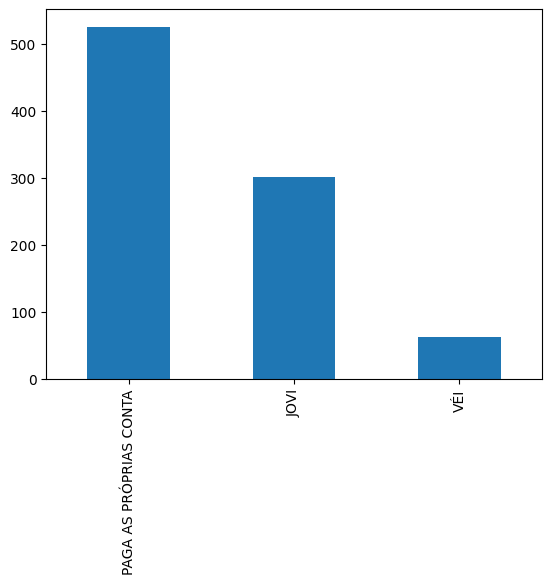

In [60]:
df_titanic = pd.read_excel("titanic_dataset.xlsx", index_col=0)
# print(df_titanic)

df_titanic.drop("Cabin", axis=1, inplace=True)

df_titanic.dropna(subset=["Embarked"], inplace=True)

# df_titanic.fillna(-1, inplace=True)
# Caso queiramos trocar todos os valores NaN do dataframe por ND
# df_titanic.fillna("ND", inplace=True)
# Caso queiramos trocar todos os valores NaN da coluna Age do dataframe por ND
# df_titanic["Age"] = df_titanic["Age"].fillna("ND")

df_titanic["Age"] = pd.to_numeric(df_titanic["Age"])

df_titanic["Age"] = df_titanic["Age"].fillna(df_titanic["Age"].mean())
# print(df_titanic)

# Contabilizando quantas pessoas do sexo masculino e feminino embarcaram no Titanic
print(df_titanic["Sex"].value_counts())
# df_titanic.count()

# Qual é a média de Fare para cada classe?
groups = df_titanic.groupby("Pclass")
groups["Fare"].mean()
print(groups["Fare"].agg(["mean", "median"]))

# Visualizando os grupos de alguma maneira
# for group in groups:
#   print(group)

# df_titanic["Name"].str.upper()
filtro_contem_substring = df_titanic[df_titanic["Name"].str.contains("B")]
print(filtro_contem_substring)
print("Filtro para checar a primeira letra do sobrenome do passageiro:", df_titanic[df_titanic["Name"].str[0] == "B"])

# Removendo todos os passageiros que tem nome começando com B
passageiros_com_b = df_titanic[df_titanic["Name"].str[0] == "B"]
df_titanic.drop(passageiros_com_b.index)

# startswith -> vai checar se possui a substring a partir do início da string original
# def agrupa_faixa(index):
#   print(["Age"])
# df_titanic.groupby(agrupa_faixa)

def gera_faixa(passageiro):
  if passageiro["Age"] == "ND":
    return "SEI LÁ"

  idade = int(passageiro["Age"])
  if idade <= 25:
    return "JOVI"
  elif idade <= 50:
    return "PAGA AS PRÓPRIAS CONTA"
  else:
    return "VÉI"

df_titanic["Faixa Idade"] = df_titanic.apply(gera_faixa, axis=1)

maior_idade = df_titanic["Age"].max()
df_titanic["Faixa Idade"] = pd.cut(df_titanic["Age"], bins=[0, 25, 50, maior_idade], labels=["JOVI", "PAGA AS PRÓPRIAS CONTA", "VÉI"])

df_titanic["Faixa Idade"].value_counts().plot.bar()